In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (16., 6.)

from sklearn.kernel_ridge import KernelRidge

import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

N = 50
# Set N = 1000 and re-run to see what happens when there is a lot of data
# N = 1000
sigma = 0.1
x = np.linspace(-10, 10, N)
ytrue = np.sin(np.abs(x))/np.abs(x)
y = ytrue + np.random.randn(N) * sigma

kr_wide = KernelRidge(alpha=2, kernel='rbf', gamma=0.001)
kr_narrow = KernelRidge(alpha=0.000002, kernel='rbf', gamma=50)
kr = KernelRidge(alpha=0.2, kernel='rbf', gamma=0.5)

kr_wide.fit(x.reshape(-1, 1), y)
kr_narrow.fit(x.reshape(-1, 1), y)
kr.fit(x.reshape(-1, 1), y)

xx = np.linspace(-10, 10, 10000)
yy_true = np.sin(np.abs(xx))/np.abs(xx)

In [3]:
# Define the RBF kernel that will be used throughout
# This was not defined before the models, as kernel='rbf' is inbuilt in sklearn
def rbf(x, c=0, gamma=1):
    return np.exp(-gamma * (x - c)**2)

<IPython.core.display.Javascript object>


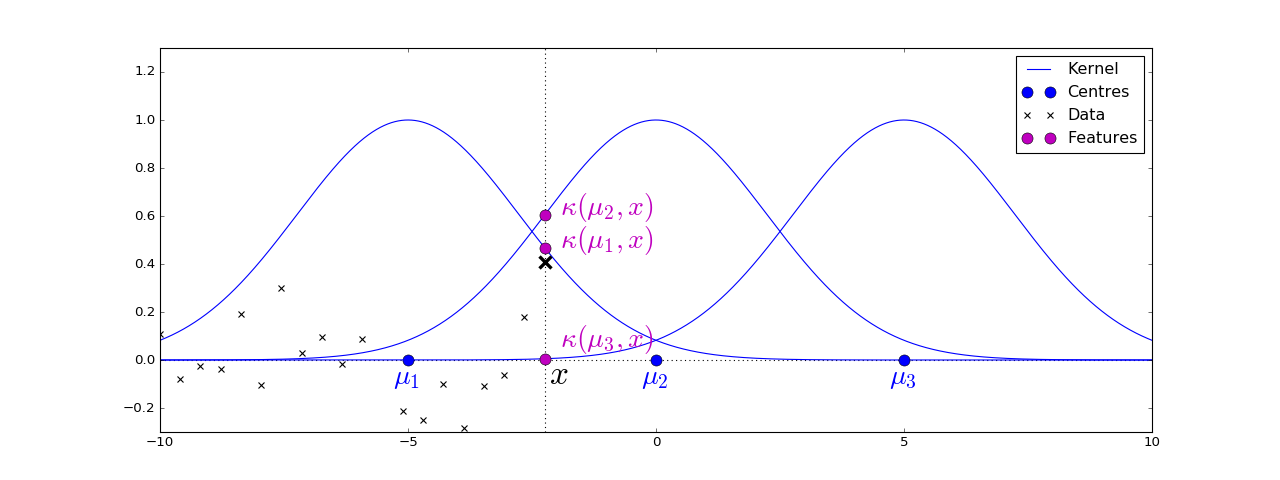

In [4]:
# Make plot to explain how kernel regression works
# This is not really required for running Kernel Ridge Regression
# But the same data is used to keep things consistent

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_xlim(-10, 10)
ax.set_ylim(-0.3, 1.3)
ax.plot([-10, 10], [0, 0], c='k', ls=':', lw=1)

centres = [-5, 0, 5]
centrenames = ['$\mu_1$', '$\mu_2$', '$\mu_3$']
for (i, ctr) in enumerate(centres):
    ax.plot(xx,  rbf(xx, c=ctr, gamma=0.1), c='b', label='Kernel' if i==0 else None)
    ax.text(ctr-0.3, -0.1, centrenames[i], fontsize=25, color='b')
    ax.plot([ctr], [0], ls='', markersize=10, marker='o', c='b', label='Centres' if i==0 else None)


ax.plot(x[:19], y[:19], ls='', marker='x', markersize=6, markeredgewidth=1, color='k', label='Data')
ax.plot(x[19:20], y[19:20], ls='', marker='x', markersize=10, markeredgewidth=3, color='k')
ax.plot([x[19], x[19]], [-0.3, 1.3], c='k', ls=':')
features = [rbf(x[19], c=ctr, gamma=0.1) for ctr in centres]
feature_texts = ['$\kappa(\mu_1, x)$', '$\kappa(\mu_2, x)$', '$\kappa(\mu_3, x)$']
ax.plot([x[19]]*len(features), features, marker='o', c='m', ls='', markersize=10, label='Features')
ax.text(x[19] + 0.08, -0.1, '$x$', color='k', fontsize=30)
for (i, f) in enumerate(features):
    ax.text(x[19] + 0.3, f + 0.05 if i==2 else f, feature_texts[i], fontsize=25, color='m')
ax.legend()

In [5]:
krmodels = {'narrow': kr_narrow, 'wide': kr_wide, 'right': kr}
labels = {'narrow': 'Narrow width kernel', 'right': 'Kernel with suitable width', 'wide': 'Wide width kernel'}
colors = {'true': 'c', 'narrow': 'r', 'wide': 'g', 'right': 'b'}

In [6]:
def plotKRandData(choice, plot_true=True):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.set_xlim(-10, 10)
    ax.set_ylim(-0.3, 1.3)
    ax.plot([-10, 10], [0, 0], c='k', ls=':', lw=1)
    
    # Plot data
    ax.plot(x, y, ls='', marker='x', markersize=6, markeredgewidth=2, color='k', label='Data')
    
    # Plot function fit by kernel regression
    yy = krmodels[choice].predict(xx.reshape(-1, 1))
    ax.plot(xx, yy, c=colors[choice], label=labels[choice])
    if plot_true is True:
        ax.plot(xx, yy_true, c= colors['true'], label='True Function')

    ax.legend()

In [7]:
def plotKRcomposition(choice, plot_true=True):
    fig = plt.figure()
    ax3 = fig.add_subplot(1, 1, 1)
    ax3.set_xlim(-10, 10)
    ax3.set_ylim(-1, 1.3)
    
    yhh = np.zeros(xx.shape)
    width = krmodels[choice].get_params()['gamma'] # the parameter gamma is the width
    
    

    # Plot the kernel with weight at each datapoint
    for (i, coef) in enumerate(krmodels[choice].dual_coef_):
        tyy = coef * rbf(xx, x[i], width)
        ax3.plot(xx, tyy)
        yhh += tyy
    # Plot the function fit by kernel regression
    ax3.plot(xx, yhh, lw=5, label=labels[choice], c=colors[choice])
    if plot_true is True:
        ax3.plot(xx, yy_true, lw=5, label='True Function', c=colors['true'])
    # Plot the data
    ax3.plot(x, y, ls='', marker='x', markersize=6, markeredgewidth=2, color='k', label='Data')
    ax3.legend()

<IPython.core.display.Javascript object>


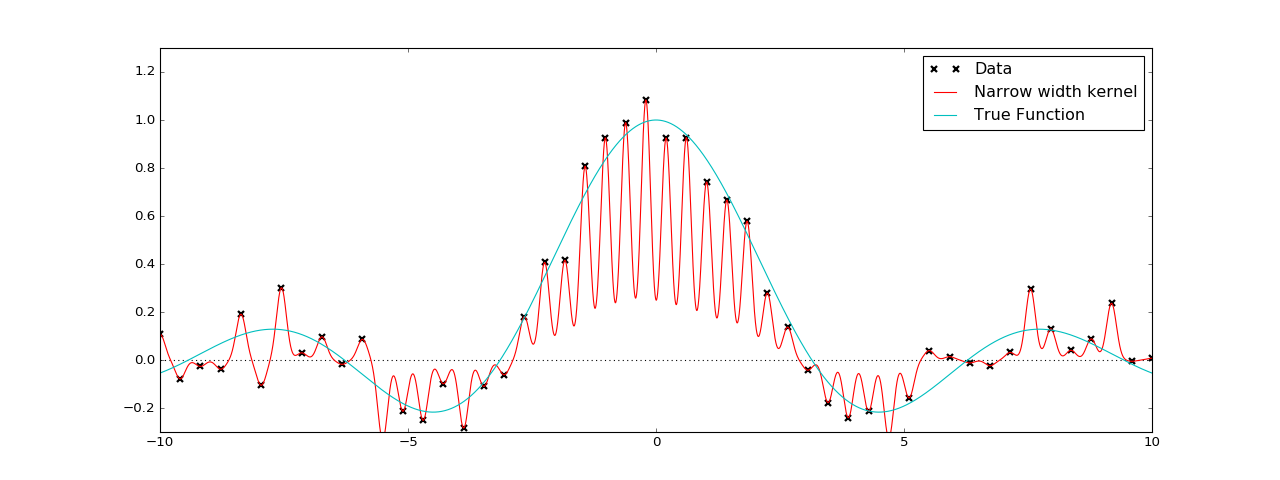

In [8]:
plotKRandData('narrow')